In [ ]:
#initial imports and formatting
import pandas as pd
import numpy as np
import json
import seaborn as sns
from os import path
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
#import dataframe
ogvideos_df = pd.read_csv('US_youtube_trending_data.csv', index_col='video_id')

#convert dates to readable formats
#videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')
#videos_df['publishedAt'] = pd.to_datetime(videos_df['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
#videos_df.insert(2,'publish_date',videos_df['publishedAt'].dt.date)
#videos_df.insert(3,'publish_time',videos_df['publishedAt'].dt.time)

#format categoryIds into readable categories using json file
ogvideos_df['categoryId'] = ogvideos_df['categoryId'].astype(str)
categories_df = pd.read_json('US_category_id.json')
categorydict = {}
for category in categories_df['items']:
    categorydict[category['id']] = category['snippet']['title']
ogvideos_df.insert(4, 'category', ogvideos_df['categoryId'].map(categorydict))

ogvideos_df.head()

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
video_id,,,,,,,,,,,,,,,,
3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
#data cleanup 

print("Original Shape:\t\t\t", ogvideos_df.shape,"\n")

#remove unneeded columns
unneededColumns = ['channelId','thumbnail_link','comments_disabled','ratings_disabled', 'description']
videos_df = ogvideos_df.drop(unneededColumns, axis=1)
print("Shape with columns removed:\t", videos_df.shape,"\n")

#remove duplicates (this doesnt remove the same videos that trended on different days)
videos_df = videos_df.drop_duplicates(keep = "first")
videos_df = videos_df.dropna()
print("Shape with duplicates removed:\t", videos_df.shape,"\n")

# display first five sample data pieces
videos_df.head()

Original Shape:			 (143590, 16) 

Shape with columns removed:	 (143590, 11) 

Shape with duplicates removed:	 (143507, 11) 



,title,publishedAt,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count
video_id,,,,,,,,,,,
3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,People & Blogs,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313
M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,Gaming,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549
J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,Entertainment,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221
kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,Music,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647
VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,Howto & Style,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196


In [ ]:
#this section of code groups the category column 
#and sums the values of other columns (view_count, likes, dislikes, comment_count)
df2 = videos_df.groupby('category').sum()
df2.reset_index(inplace=True)
df2

,category,view_count,likes,dislikes,comment_count
0,Autos & Vehicles,2569266795,118314215,1405383,9952959
1,Comedy,14840083775,1038742662,11169849,50388747
2,Education,6442452917,367882601,4040223,20978151
3,Entertainment,92949544732,4672492888,62533638,288641596
4,Film & Animation,13059055952,581252075,6680034,40908377
5,Gaming,52774701366,2894892428,38360441,220776169
6,Howto & Style,5919202012,303277849,7261069,22461734
7,Music,105650615409,7120659284,105996239,779982642
8,News & Politics,12721502000,167704282,9978176,39467351
9,Nonprofits & Activism,279268359,12837346,112968,887347


In [ ]:
#summary of mathematical values (count/mean/std/min/etc)
videos_df.describe()

,view_count,likes,dislikes,comment_count
count,1.435070e+05,1.435070e+05,143507.000000,1.435070e+05
mean,2.627230e+06,1.402283e+05,2123.652121,1.160327e+04
std,6.837747e+06,4.032551e+05,10917.176009,8.280207e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.056385e+05,2.034450e+04,0.000000,1.425000e+03
50%,1.036165e+06,4.792100e+04,398.000000,3.255000e+03
75%,2.339198e+06,1.206960e+05,1377.000000,7.855000e+03
max,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06


In [ ]:
#summary of count, number of unique videos, top videos, freq
videos_df.describe(include=['O'])

,title,publishedAt,channelTitle,category,categoryId,trending_date,tags
count,143507,143507,143507,143507,143507,143507,143507
unique,26930,25914,6187,15,15,698,19141
top,Starlink Mission,2021-06-04T04:00:11Z,NBA,Entertainment,24,2021-06-03T00:00:00Z,[None]
freq,145,43,857,28929,28929,400,23143


In [ ]:
#some interesting/useful  video stats

#number of videos with more comments than likes (controversial, encouraging discussion, often politics)
print(videos_df.query('comment_count > likes').shape)

#number of videos with more dislikes than likes (controversial, moreso silly or reality tv)
print(videos_df.query('dislikes > (likes)').shape)

#top trending videos by views, likes, and comments
dataframeShow = input("Sort trending videos by views (1), likes (2), or comments (3)?")
if dataframeShow =='1':
  df1=videos_df.sort_values('view_count',ascending=False)
  print(df1.head())
elif dataframeShow =='2':
  df2=videos_df.sort_values('likes',ascending=False)
  print(df2.head())
elif dataframeShow =='3':
  df3=videos_df.sort_values('comment_count',ascending=False)
  print(df3.head())
else:
  print("incorrect input")

(1556, 11)
(401, 11)
Sort trending videos by views (1), likes (2), or comments (3)?2
                                          title           publishedAt  \
video_id                                                                
WMweEpGlu_U    BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z   
gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   
gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   
gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   
gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   

               channelTitle category categoryId         trending_date  \
video_id                                                                
WMweEpGlu_U     HYBE LABELS    Music         10  2021-05-30T00:00:00Z   
gdZLi9oWNZg  Big Hit Labels    Music         10  2020-08-28T00:00:00Z   
gdZLi9oWNZg  Big Hit Labels    Music         10  2020-08-27T00:00:00Z   
gdZLi9oWNZg  Big Hit Labels    Music  

In [ ]:
#correlation between likes, dislikes, and viewcount
#strong correlations in general, but strongest between likes and views
cols = ['view_count', 'likes', 'dislikes']
cor = videos_df[cols].corr()
print(cor)

            view_count     likes  dislikes
view_count    1.000000  0.835465  0.618809
likes         0.835465  1.000000  0.588608
dislikes      0.618809  0.588608  1.000000


['People & Blogs' 'Gaming' 'Entertainment' 'Music' 'Howto & Style'
 'Education' 'Comedy' 'Science & Technology' 'Film & Animation'
 'News & Politics' 'Sports' 'Travel & Events' 'Pets & Animals'
 'Autos & Vehicles' 'Nonprofits & Activism']

Which category? Choose from the above: Sports
Starting from which year? Enter a number: 2021
Starting from which month? Enter a number: 2


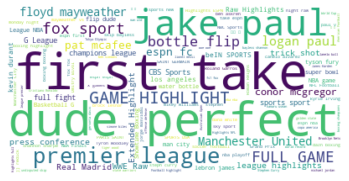

In [ ]:
#Visualization 1
import pandas as pd
import numpy as np
import warnings
import regex as re
warnings.filterwarnings('ignore')#to filter all the warnings
import seaborn as sns
from os import path
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords

stopwords = set(STOPWORDS)
def generate_wordcloud(text, words):
    wordcloud = WordCloud(stopwords=words, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')
videos_df['publishedAt'] = pd.to_datetime(videos_df['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
#print(list(categorydict.values()))
#for i in list(categorydict.values()):
#  print (i)
print(videos_df['category'].unique())
category = input("\nWhich category? Choose from the above: ")
timeyear = input("Starting from which year? Enter a number: ")
time = input("Starting from which month? Enter a number: ")
dateMask = (videos_df.trending_date > pd.Timestamp(int(timeyear),int(time),1)) & (videos_df.trending_date < pd.Timestamp(2022,7,1))
tag_text = " ".join(text for text in videos_df.tags[(videos_df.category == category ) & (dateMask)])
title = " ".join(text for text in videos_df.title[(videos_df.category == category ) & (dateMask) ])
tagtitle = tag_text + ' ' + title
generate_wordcloud(tagtitle, stopwords)

In [ ]:
#*unfinished
#STACKED BAR GRAPH

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
plt.rcParams.update(params)

cat = df2['category']
lik = df2['likes']
dis = df2['dislikes']

# plot bars in stack manner
plt.bar(cat, lik, color='c')
plt.bar(cat, dis, bottom=lik, color='m')
plt.title("Comparing the number of likes/dislikes for each category")
plt.xlabel("Category")
plt.ylabel("Comparison of likes and dislikes")
plt.show()